In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("music_genre_dataset_3s.csv")
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.285298,0.086706,0.091761,0.001133,3276.215694,3.693333e+05,2916.022530,102253.126145,6680.427809,1.798876e+06,...,81.728333,-8.016793,47.913460,-10.906729,60.488522,-4.270420,64.380051,-1.923929,75.449295,disco
1,0.327101,0.086974,0.100778,0.002665,3534.066907,6.365957e+05,2957.105230,126518.777304,7062.559345,1.945707e+06,...,48.778934,-7.552033,91.610092,-9.295936,69.014847,0.544236,103.389603,4.021569,156.475906,disco
2,0.326370,0.095633,0.179238,0.002508,3009.821409,1.402561e+05,2709.659628,46263.530928,5924.860840,9.264226e+05,...,60.553059,-0.750833,32.326462,-0.968993,74.716179,5.105722,77.700203,1.800243,43.481514,disco
3,0.480415,0.063639,0.114344,0.001327,3136.623243,1.341594e+05,2794.254763,36543.910133,6397.266188,7.779451e+05,...,23.886192,-1.929714,19.642111,-0.206708,15.515617,-1.350342,24.644806,-0.643269,34.162071,disco
4,0.442163,0.075320,0.105870,0.001530,3171.434750,2.814009e+05,2841.453364,68787.542920,6568.786433,1.273905e+06,...,21.190182,-4.949401,22.232727,-3.558487,23.146450,-2.910673,29.253557,-0.246291,25.574080,disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.435238,0.086557,0.103821,0.001894,4081.668914,2.792889e+06,3363.543342,120925.307453,8205.723971,2.846081e+06,...,45.228214,-3.198057,70.633293,-5.713421,73.205231,-6.799469,60.234043,-3.217395,49.351383,pop
9986,0.429612,0.083857,0.089019,0.003090,4018.160771,1.126120e+06,3353.723207,150173.553793,8230.487154,2.666355e+06,...,42.714371,2.790577,67.636070,6.358562,82.413681,4.702106,64.624382,4.358342,79.285851,pop
9987,0.405222,0.083414,0.105119,0.001795,4090.532142,7.955471e+05,3323.729617,29693.028267,8359.355093,8.595567e+05,...,30.459600,0.875759,17.347967,-2.688674,25.306997,-2.236483,28.224962,-2.191945,24.670353,pop
9988,0.441512,0.075007,0.103171,0.001888,3832.784257,6.504125e+05,3313.213746,55863.389270,8118.100398,1.036730e+06,...,39.250877,-1.630068,30.623005,-3.644751,21.583889,-0.667289,29.223938,-0.409209,29.261759,pop


In [3]:
dataset = dataset.sample(frac=1)
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
9415,0.390802,0.096888,0.242262,0.008111,3849.704554,9.991400e+05,3324.655976,186831.701697,8133.339280,1.620736e+06,...,36.004749,-8.826341,40.051659,-5.133151,45.382736,-5.861200,59.018948,-5.558251,30.286091,pop
2383,0.403238,0.085034,0.119212,0.003684,2911.243187,1.944785e+06,2626.627783,349971.365558,5731.062012,6.049334e+06,...,57.318020,-0.405566,64.709251,-3.430591,55.133511,-5.753852,47.042797,-4.444348,26.333662,reggae
965,0.400962,0.077592,0.169887,0.001125,3028.953000,2.156558e+05,2809.215939,58306.248335,6500.128643,9.654485e+05,...,25.430897,-6.500979,28.656641,-5.670052,29.177303,-8.490669,20.348888,-6.907252,39.383884,disco
8537,0.412076,0.083018,0.077667,0.001063,2459.163936,3.686751e+05,2679.151067,189598.107625,5394.895583,2.676675e+06,...,39.132130,-0.041698,58.812794,-1.491426,31.927765,-2.562216,31.415930,-2.996634,40.131268,country
4201,0.364126,0.083532,0.085102,0.001409,2216.255445,2.614396e+05,2169.478936,79729.557784,4740.203388,9.358747e+05,...,22.009216,-5.917901,27.023252,4.420880,17.993401,-8.273458,21.412994,-2.584400,15.128736,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,0.345413,0.083650,0.113506,0.001292,1788.371837,1.942532e+05,1925.479560,112798.849073,3832.081956,1.221693e+06,...,68.734299,-7.267223,41.415684,2.189648,28.712296,-0.273187,47.910797,-7.434132,57.582413,country
21,0.470781,0.078284,0.089770,0.001610,2603.873838,4.565151e+05,2523.582994,79472.218293,5726.341271,1.341175e+06,...,25.574820,-1.034328,21.906532,10.629930,48.854538,-5.071685,24.633308,-2.644569,40.463760,disco
8001,0.270512,0.089314,0.154512,0.000688,1437.726806,2.549210e+05,1769.381839,160755.947837,2721.548415,1.525247e+06,...,18.577291,-7.328596,23.838100,-5.888368,23.748096,-3.548723,24.321867,-5.249280,31.157290,country
436,0.336499,0.088552,0.187012,0.003143,1688.469198,3.374203e+05,2378.406773,261832.853597,3723.173640,3.353714e+06,...,19.435844,-4.027746,44.961868,3.832410,34.258614,0.346640,29.625357,-4.892694,34.484028,disco


In [4]:
X = dataset.drop(columns=["label"])
y = dataset["label"]

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[ 0.43551508,  1.44335631,  1.64596044, ...,  0.10184313,
        -0.88255162, -0.57933557],
       [ 0.57449236,  0.14428419, -0.15933264, ..., -0.1867872 ,
        -0.6702013 , -0.66465463],
       [ 0.54905715, -0.67127972,  0.58413121, ..., -0.83012179,
        -1.13972012, -0.38294615],
       ...,
       [-0.90877383,  0.6133266 ,  0.35856127, ..., -0.73437131,
        -0.82365055, -0.56052945],
       [-0.17134268,  0.52981951,  0.83537578, ..., -0.60655494,
        -0.75567233, -0.48871685],
       [ 0.10301339, -0.14262072,  0.43672951, ..., -0.50018496,
        -1.00267421,  0.01363682]])

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([7, 8, 3, ..., 2, 3, 4])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **Neural Networks**

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [9]:
opt = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [10]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=50,
    restore_best_weights=True
) 

In [11]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=800, batch_size=128, callbacks=early_stopping)

Epoch 1/800
63/63 [==============================] - 9s 73ms/step - loss: 2.1687 - accuracy: 0.2773 - val_loss: 1.8220 - val_accuracy: 0.4825
Epoch 2/800
63/63 [==============================] - 1s 9ms/step - loss: 1.5315 - accuracy: 0.4731 - val_loss: 1.4444 - val_accuracy: 0.6031
Epoch 3/800
63/63 [==============================] - 1s 9ms/step - loss: 1.3002 - accuracy: 0.5492 - val_loss: 1.1480 - val_accuracy: 0.6717
Epoch 4/800
63/63 [==============================] - 1s 9ms/step - loss: 1.1634 - accuracy: 0.6060 - val_loss: 0.9600 - val_accuracy: 0.7072
Epoch 5/800
63/63 [==============================] - 1s 9ms/step - loss: 1.0697 - accuracy: 0.6345 - val_loss: 0.8325 - val_accuracy: 0.7302
Epoch 6/800
63/63 [==============================] - 1s 10ms/step - loss: 0.9867 - accuracy: 0.6720 - val_loss: 0.7649 - val_accuracy: 0.7472
Epoch 7/800
63/63 [==============================] - 1s 10ms/step - loss: 0.9269 - accuracy: 0.6911 - val_loss: 0.7042 - val_accuracy: 0.7643
Epoch 8/80

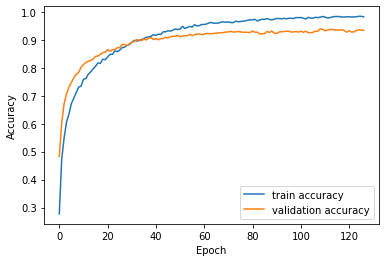

In [12]:
plt.plot(hist.history["accuracy"], label="train accuracy")
plt.plot(hist.history["val_accuracy"], label="validation accuracy")    
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.show()

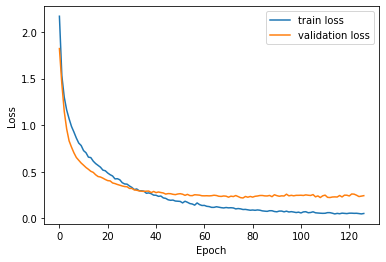

In [13]:
plt.plot(hist.history["loss"], label="train loss")
plt.plot(hist.history["val_loss"], label="validation loss")    
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
test_acc

16/16 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9269


0.9269269108772278

### **Make prediction from a new .wav file**

In [15]:
from functions import extract_features_audio
file_path = "GTZAN_dataset/classical/classical.00024.wav"
audio_data, sr = librosa.load(file_path, offset=0, duration=30)
features = extract_features_audio(audio_data, sr)

In [16]:
from functions import columns
# data normalization
test_frame = pd.DataFrame([features], columns=columns[:-1])
train_plus_test = dataset.append(test_frame)
train_plus_test = train_plus_test.drop(columns=["label"])
train_plus_test_norm = ss.fit_transform(train_plus_test)
test_frame_norm = train_plus_test_norm[-1]
test_frame_norm = np.array([test_frame_norm])

C:\Users\ychaf\AppData\Local\Temp\ipykernel_11668\3974946196.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_plus_test = dataset.append(test_frame)


In [17]:
one_pred_nn = model.predict(test_frame_norm)

### **Neural Network prediction**

In [18]:
one_pred_nn

array([[1.1811102e-06, 9.9972504e-01, 8.4912208e-06, 3.0838100e-06,
        1.8654817e-06, 2.4840535e-04, 7.2077319e-06, 2.2611632e-06,
        6.1080436e-07, 1.8787795e-06]], dtype=float32)

In [19]:
index = np.argmax(one_pred_nn)

In [20]:
le.inverse_transform([index])[0]

'classical'

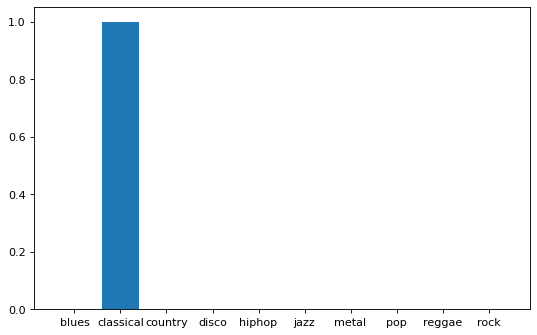

In [22]:
plt.figure(figsize=(8, 5), dpi=80)
plt.bar(le.inverse_transform([i for i in range(10)]), one_pred_nn[0])
plt.show()

In [23]:
# model.save('nn_model_music.h5')